# PROJET ENERGIE - MODELISATION AU NIVEAU NATIONAL
**Step 1 :**
Élaboration des premières itérations de modélisation.
Analysez vos premiers résultats, votre approche est-elle pertinente ? Et votre modèle ?

**Step 2 :**
Interprétation : Utilisez les métriques de Machine Learning et de statistiques afin d’exploiter et comprendre au mieux les résultats de votre modèle.
Optimisation : Essayer d’améliorer votre modèle à l’aide d’outils d’optimisation, vous pouvez essayer d’autres modèles plus complexes et comparer les résultats.
Conclusions scientifiques et métiers en fonction du succès ou de l’échec de la modélisation.

**Affichage du fichier de données nettoyées :**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Energie/DataFrame.csv')
df.head()

,Année,Mois,Jour,Saison,Consommation (MW),Production (MW),Energies renouvelables (MW),Température moyenne (°C),Température référence (°C),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW)
0,2013,1,1,0,2556595.0,2976402.0,480755.0,7.3,4.6,172372.0,2323275.0,121486.0,5632.0,319876.0,33761.0
1,2013,1,4,0,3131399.0,3446203.0,505912.0,8.1,4.6,255009.0,2685282.0,48829.0,6803.0,414300.0,35980.0
2,2013,1,5,0,2886822.0,3295082.0,473266.0,7.5,4.6,175314.0,2646502.0,43992.0,7199.0,385204.0,36871.0
3,2013,1,8,0,3431436.0,3760855.0,549772.0,4.5,4.7,466067.0,2745016.0,19945.0,7047.0,487315.0,35465.0
4,2013,1,9,0,3500917.0,3784440.0,583185.0,4.1,4.7,396450.0,2804805.0,21884.0,6700.0,518757.0,35844.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Année                        3215 non-null   int64  
 1   Mois                         3215 non-null   int64  
 2   Jour                         3215 non-null   int64  
 3   Saison                       3215 non-null   int64  
 4   Consommation (MW)            3215 non-null   float64
 5   Production (MW)              3215 non-null   float64
 6   Energies renouvelables (MW)  3215 non-null   float64
 7   Température moyenne (°C)     3215 non-null   float64
 8   Température référence (°C)   3215 non-null   float64
 9   Thermique (MW)               3215 non-null   float64
 10  Nucléaire (MW)               3215 non-null   float64
 11  Eolien (MW)                  3215 non-null   float64
 12  Solaire (MW)                 3215 non-null   float64
 13  Hydraulique (MW)  

**Vérification des valeurs manquantes :**

In [4]:
df.isna().sum().sum()

0

**Premier test avec toutes les colonnes**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_un = df
df_un.head()

target_un = df_un['Consommation (MW)']
feats_un = df_un.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_un, target_un, test_size=0.25, random_state = 42)
cols = feats_un.columns

sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])


In [6]:
# On entraîne un modèle de régression linéaire

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_l = lr.predict(X_test)
pred_l_train = lr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_l[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309     90128.186178
139    -131799.813822
3028       -96.813822
1161    125322.186178
1023    121977.186178
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9518441844089172
Coefficient de détermination du modèle sur test: 0.9550433190545952


In [7]:
import joblib
joblib.dump(lr, "model_reg_line")

['model_reg_line']

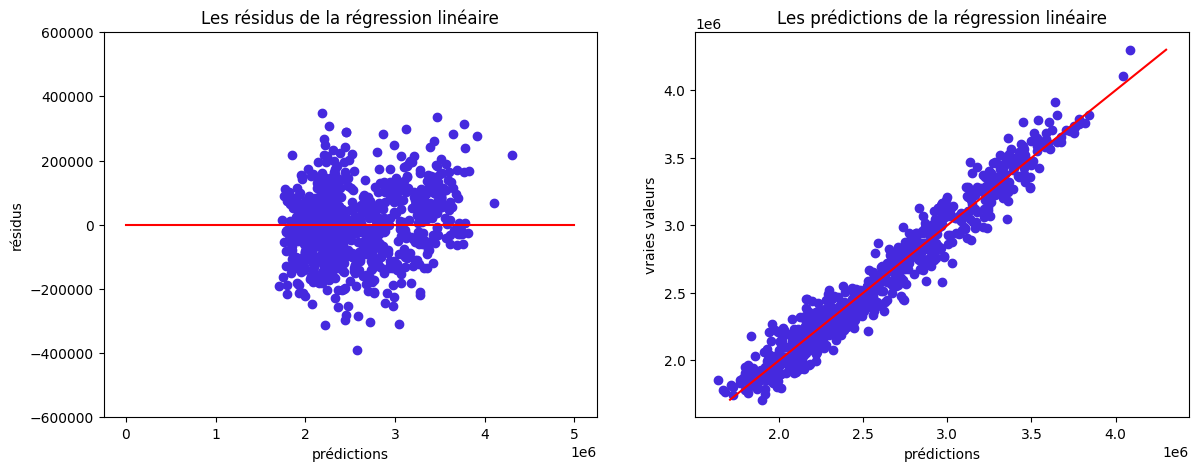

In [8]:
residus_l = y_test - pred_l
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_l, color='#4529de')
plt.plot((0, 5000000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-600000,600000])
plt.title('Les résidus de la régression linéaire')

plt.subplot(122)
plt.scatter(pred_l, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de la régression linéaire')
plt.show()

In [9]:
# On entraîne un modèle d'arbre de décision

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred_a = dtr.predict(X_test)
pred_a_train = dtr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_a[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     17356.0
139      14676.0
3028    114534.0
1161      5464.0
1023     11479.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9450855922389325


In [10]:
joblib.dump(dtr, "model_reg_dtr")

['model_reg_dtr']

In [11]:
# On teste l'arbre de décision avec différentes profondeurs d'arbre

from sklearn.tree import DecisionTreeRegressor
liste = list(range(1, 10))

for l in liste :
  dtr = DecisionTreeRegressor(random_state=42, max_depth=l)
  dtr.fit(X_train, y_train)
  print('max_depth = ', l)
  print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
  print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

  #Le plus intéressant est les coefficients avec max_depth = 6

max_depth =  1
Coefficient de détermination du modèle sur train: 0.696024036678546
Coefficient de détermination du modèle sur test: 0.7149970193454751
max_depth =  2
Coefficient de détermination du modèle sur train: 0.8226346472231545
Coefficient de détermination du modèle sur test: 0.8385053962055591
max_depth =  3
Coefficient de détermination du modèle sur train: 0.9006685839628896
Coefficient de détermination du modèle sur test: 0.9061133167370363
max_depth =  4
Coefficient de détermination du modèle sur train: 0.9350198172894933
Coefficient de détermination du modèle sur test: 0.9333829687030404
max_depth =  5
Coefficient de détermination du modèle sur train: 0.9531433900692524
Coefficient de détermination du modèle sur test: 0.9476380842212024
max_depth =  6
Coefficient de détermination du modèle sur train: 0.9656655249394943
Coefficient de détermination du modèle sur test: 0.9573220875096127
max_depth =  7
Coefficient de détermination du modèle sur train: 0.9756264237507523
Coeff

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42, max_depth=6)
dtr.fit(X_train, y_train)
print('max_depth = ', 6)
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

max_depth =  6
Coefficient de détermination du modèle sur train: 0.9656655249394943
Coefficient de détermination du modèle sur test: 0.9573220875096127


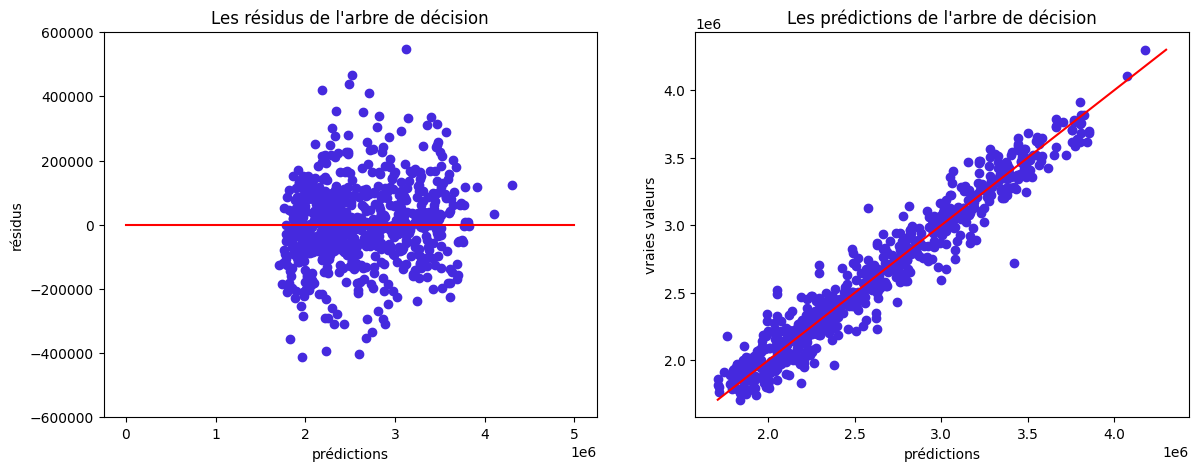

In [18]:
residus_a = y_test - pred_a
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_a, color='#4529de')
plt.plot((0, 5000000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-600000,600000])
plt.title('Les résidus de l\'arbre de décision')

plt.subplot(122)
plt.scatter(pred_a, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de l\'arbre de décision')
plt.show()

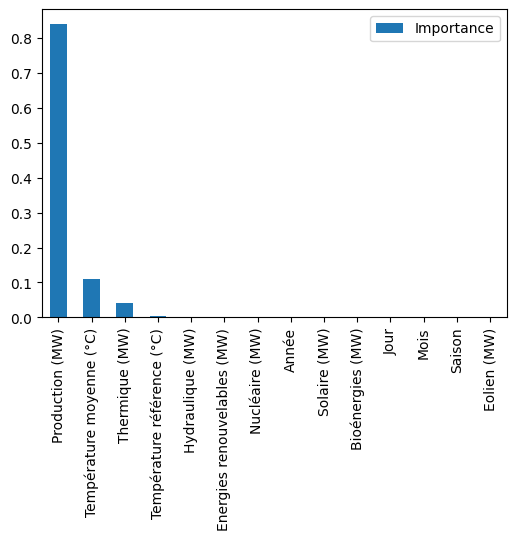

In [19]:
# On utilise l'arbre de décision pour afficher l'importance des variables

import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(dtr.feature_importances_, index=feats_un.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4));

In [20]:
# On entraîne un modèle de forêt aléatoire

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred_f = forest.predict(X_test)
pred_f_train = forest.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_f[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    48002.19
139    -99846.24
3028    35895.88
1161    37937.74
1023    52826.48
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9963077580150688
Coefficient de détermination du modèle sur test: 0.97620340345898


In [21]:
import joblib
joblib.dump(forest, "model_reg_forest")

['model_reg_forest']

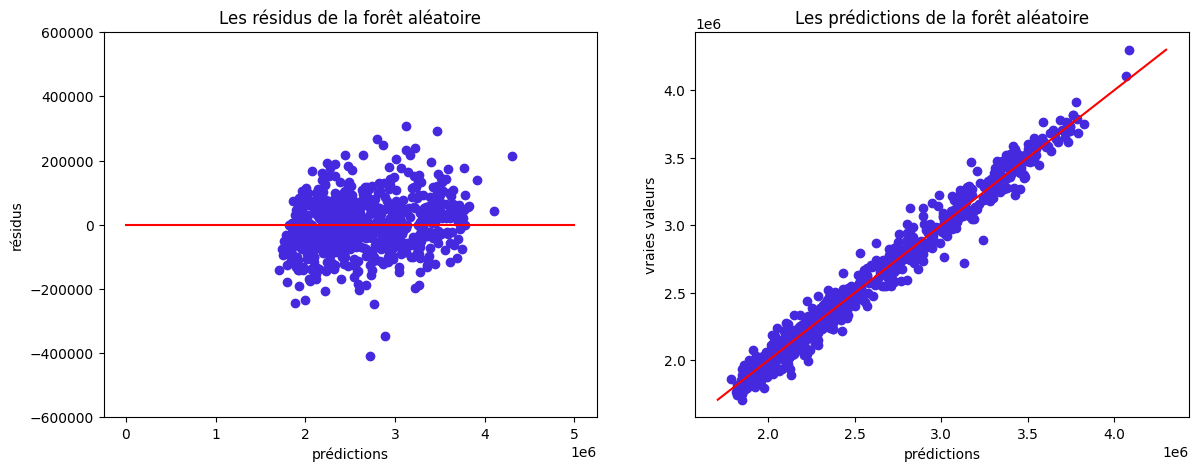

In [22]:
residus_f = y_test - pred_f
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(y_test, residus_f, color='#4529de')
plt.plot((0, 5000000), (0, 0), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("résidus")
plt.ylim([-600000,600000])
plt.title('Les résidus de la forêt aléatoire')

plt.subplot(122)
plt.scatter(pred_f, y_test, color='#4529de')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prédictions")
plt.ylabel("vraies valeurs")
plt.title('Les prédictions de la forêt aléatoire')
plt.show()

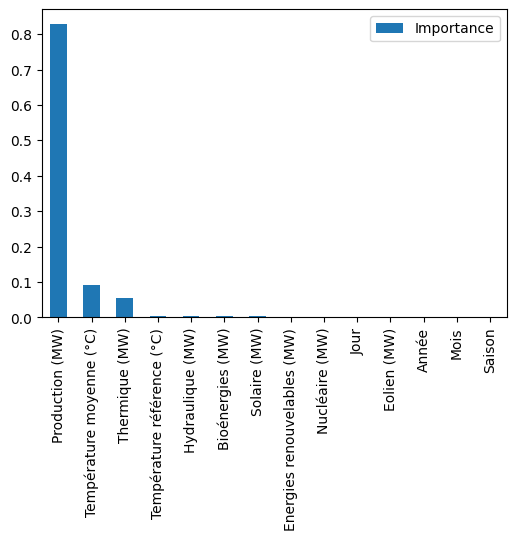

In [23]:
# On utilise la forêt aléatoire pour afficher l'importance des variables

import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(forest.feature_importances_, index=feats_un.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(6,4));

**Métrique des 3 modèles**

In [24]:
# Les metrics de ces 3 modèles :

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lineaire = ['lineaire test', mean_absolute_error(y_test, pred_l), mean_squared_error(y_test, pred_l), np.sqrt(mean_squared_error(y_test, pred_l)), lr.score(X_test, y_test)]
arbre = ['arbre test', mean_absolute_error(y_test, pred_a), mean_squared_error(y_test, pred_a), np.sqrt(mean_squared_error(y_test, pred_a)), dtr.score(X_test,y_test)]
foret = ['forêt test', mean_absolute_error(y_test, pred_f), mean_squared_error(y_test, pred_f), np.sqrt(mean_squared_error(y_test, pred_f)), forest.score(X_test,y_test)]
lineaire_t = ['linéaire train', mean_absolute_error(y_train, pred_l_train), mean_squared_error(y_train, pred_l_train), np.sqrt(mean_squared_error(y_train, pred_l_train)), lr.score(X_train, y_train)]
arbre_t = ['arbre train', mean_absolute_error(y_train, pred_a_train), mean_squared_error(y_train, pred_a_train), np.sqrt(mean_squared_error(y_train, pred_a_train)), dtr.score(X_train, y_train)]
foret_t = ['forêt train', mean_absolute_error(y_train, pred_f_train), mean_squared_error(y_train, pred_f_train), np.sqrt(mean_squared_error(y_train, pred_f_train)), forest.score(X_train, y_train)]
tableau = [lineaire,lineaire_t,arbre,arbre_t,foret,foret_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse','r²'])
display(dataF.set_index('modèle'))

,mae,mse,rmse,r²
modèle,,,,
lineaire test,87616.945789,1.225564e+10,110705.204047,0.955043
linéaire train,89388.184661,1.283468e+10,113290.254095,0.951844
arbre test,88274.858209,1.497022e+10,122352.843950,0.957322
arbre train,0.000000,0.000000e+00,0.000000,0.965666
forêt test,60794.934677,6.487191e+09,80543.099827,0.976203
forêt train,23347.732012,9.840712e+08,31369.908917,0.996308


In [ ]:
# On entraîne un modèle de GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=9, random_state=42, n_estimators=1300, learning_rate=0.05)
gbr.fit(X_train, y_train)
pred_g = gbr.predict(X_test)
pred_g_train = gbr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_g[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , gbr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", gbr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    21566.849320
139    -27528.598890
3028    43076.284164
1161    26152.486593
1023    71645.590818
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9999999990398688
Coefficient de détermination du modèle sur test: 0.9769517703046467


In [ ]:
# On teste le GradientBoostingRegressor avec différentes profondeurs

from sklearn.tree import DecisionTreeRegressor
liste = list(range(1, 21))

for l in liste :
  dtr = DecisionTreeRegressor(random_state=42, max_depth=l)
  dtr.fit(X_train, y_train)
  print('max_depth = ', l)
  print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
  print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

max_depth =  1
Coefficient de détermination du modèle sur train: 0.696024036678546
Coefficient de détermination du modèle sur test: 0.7149970193454751
max_depth =  2
Coefficient de détermination du modèle sur train: 0.8226346472231545
Coefficient de détermination du modèle sur test: 0.8385053962055591
max_depth =  3
Coefficient de détermination du modèle sur train: 0.9006685839628896
Coefficient de détermination du modèle sur test: 0.9061133167370363
max_depth =  4
Coefficient de détermination du modèle sur train: 0.9350198172894933
Coefficient de détermination du modèle sur test: 0.9333829687030404
max_depth =  5
Coefficient de détermination du modèle sur train: 0.9531433900692524
Coefficient de détermination du modèle sur test: 0.9476380842212024
max_depth =  6
Coefficient de détermination du modèle sur train: 0.9656655249394943
Coefficient de détermination du modèle sur test: 0.9573220875096127
max_depth =  7
Coefficient de détermination du modèle sur train: 0.9756264237507523
Coeff

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

gradboost = ['gradboost test', mean_absolute_error(y_test, pred_g), mean_squared_error(y_test, pred_g), np.sqrt(mean_squared_error(y_test, pred_g))]
gradboost_t = ['gradboost train', mean_absolute_error(y_train, pred_g_train), mean_squared_error(y_train, pred_g_train), np.sqrt(mean_squared_error(y_train, pred_g_train))]
tableau = [gradboost,gradboost_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse'])
display(dataF.set_index('modèle'))

,mae,mse,rmse
modèle,,,
gradboost test,59153.931421,6.283179e+09,79266.503773
gradboost train,11.747590,2.558980e+02,15.996813


**Plus on affine les paramètres et plus on a de risques de surentraînement.**

In [ ]:
# Les metrics de ces modèles :

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lineaire = ['linéaire test', mean_absolute_error(y_test, pred_l), mean_squared_error(y_test, pred_l), np.sqrt(mean_squared_error(y_test, pred_l))]
arbre = ['arbre test', mean_absolute_error(y_test, pred_a), mean_squared_error(y_test, pred_a), np.sqrt(mean_squared_error(y_test, pred_a))]
foret = ['forêt test', mean_absolute_error(y_test, pred_f), mean_squared_error(y_test, pred_f), np.sqrt(mean_squared_error(y_test, pred_f))]
lineaire_t = ['linéaire train', mean_absolute_error(y_train, pred_l_train), mean_squared_error(y_train, pred_l_train), np.sqrt(mean_squared_error(y_train, pred_l_train))]
arbre_t = ['arbre train', mean_absolute_error(y_train, pred_a_train), mean_squared_error(y_train, pred_a_train), np.sqrt(mean_squared_error(y_train, pred_a_train))]
foret_t = ['forêt train', mean_absolute_error(y_train, pred_f_train), mean_squared_error(y_train, pred_f_train), np.sqrt(mean_squared_error(y_train, pred_f_train))]
tableau = [lineaire,lineaire_t,arbre,arbre_t,foret,foret_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse'])
display(dataF.set_index('modèle'))

,mae,mse,rmse
modèle,,,
linéaire test,87616.945789,1.225564e+10,110705.204047
linéaire train,89388.184661,1.283468e+10,113290.254095
arbre test,88274.858209,1.497022e+10,122352.843950
arbre train,0.000000,0.000000e+00,0.000000
forêt test,60794.934677,6.487191e+09,80543.099827
forêt train,23347.732012,9.840712e+08,31369.908917


**Il y a un problème de surapprentissage pour le DecisionTreeRegressor. Son coefficient de détermination pour le modèle d'entraînement est égal à 1.**

**Deuxième test avec les énergies renouvelables :**

In [ ]:
df_deux = df.drop(columns=['Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Production (MW)'])

df_deux.head()

target_deux = df_deux['Consommation (MW)']
feats_deux = df_deux.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_deux, target_deux, test_size=0.25, random_state = 42)

cols = feats_deux.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309    100121.050802
139    -129457.703947
3028       138.691160
1161    129950.703836
1023    117287.447712
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.951696088804422
Coefficient de détermination du modèle sur test: 0.9547509160356087


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     17356.0
139    -229473.0
3028   -267818.0
1161    -91120.0
1023    389825.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9294955459588793


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    107561.55
139    -115382.58
3028    -38497.37
1161     56935.28
1023    135593.02
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9957551024652744
Coefficient de détermination du modèle sur test: 0.9726854680288686


**Troisième test avec seulement la production :**

In [ ]:
df_trois = df.drop(columns=['Température moyenne (°C)','Saison','Eolien (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)',])
df_trois.head()

target_trois = df_trois['Consommation (MW)']
feats_trois = df_trois.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_trois, target_trois, test_size=0.25, random_state = 42)

cols = feats_trois.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309    311394.449095
139     -28593.372972
3028   -145860.053938
1161    204052.431120
1023     95925.471449
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.8853408571882126
Coefficient de détermination du modèle sur test: 0.8946772310258402


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    116618.0
139      14676.0
3028    -77035.0
1161      5464.0
1023    126731.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.903790163250421


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    214975.62
139      12894.92
3028     15052.97
1161    118490.21
1023     31815.08
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9905972522416624
Coefficient de détermination du modèle sur test: 0.9427923339312057


**Quatrième test avec seulement les températures moyenne, températures référence :**

In [ ]:
df_quatre = df.drop(columns=['Saison', 'Année', 'Mois','Jour','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)','Thermique (MW)', 'Nucléaire (MW)','Energies renouvelables (MW)',
                            'Production (MW)'])
print(df_quatre.head())

target_quatre = df_quatre['Consommation (MW)']
feats_quatre = df_quatre.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_quatre, target_quatre, test_size=0.25, random_state = 42)

cols = feats_quatre.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

   Consommation (MW)  Température moyenne (°C)  Température référence (°C)
0          2556595.0                       7.3                         4.6
1          3131399.0                       8.1                         4.6
2          2886822.0                       7.5                         4.6
3          3431436.0                       4.5                         4.7
4          3500917.0                       4.1                         4.7


In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309    287246.040626
139     154230.528164
3028    -74649.588412
1161    347047.711302
1023    333066.460207
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.7420925090937593
Coefficient de détermination du modèle sur test: 0.7638582238742273


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    -91721.0
139     182156.0
3028   -295681.0
1161    246771.0
1023    520247.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9849558532019016
Coefficient de détermination du modèle sur test: 0.7475904973685898


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    -18258.840000
139     160765.673833
3028   -226830.615000
1161    209043.631667
1023    162234.077000
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9668312741402237
Coefficient de détermination du modèle sur test: 0.8495141782856184


**Cinquième test sans la Saison :**

In [ ]:
df_cinq = df.drop(columns=['Année', 'Saison','Energies renouvelables (MW)'])
df_cinq.head()

target_cinq = df_cinq['Consommation (MW)']
feats_cinq = df_cinq.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_cinq, target_cinq, test_size=0.25, random_state = 42)

cols = feats_cinq.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309     83608.501786
139    -125221.864401
3028      4115.490519
1161    130450.945035
1023    102668.885874
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9512539599402258
Coefficient de détermination du modèle sur test: 0.954825123776345


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     -6889.0
139      14676.0
3028    144767.0
1161     21346.0
1023     -4813.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.949664695049022


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    35082.00
139    -97723.05
3028    31204.18
1161    31233.99
1023    50573.43
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9962467384121236
Coefficient de détermination du modèle sur test: 0.9756895348642555


**Sixième test avec les feature_importances_ :**

In [ ]:
df_six = df.drop(columns=['Saison','Année','Mois','Jour','Nucléaire (MW)','Eolien (MW)','Energies renouvelables (MW)'])
print(df_six.head())

target_six = df_six['Consommation (MW)']
feats_six = df_six.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_six, target_six, test_size=0.25, random_state = 42)

cols = feats_six.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

   Consommation (MW)  Production (MW)  Température moyenne (°C)  \
0          2556595.0        2976402.0                       7.3   
1          3131399.0        3446203.0                       8.1   
2          2886822.0        3295082.0                       7.5   
3          3431436.0        3760855.0                       4.5   
4          3500917.0        3784440.0                       4.1   

   Température référence (°C)  Thermique (MW)  Solaire (MW)  Hydraulique (MW)  \
0                         4.6        172372.0        5632.0          319876.0   
1                         4.6        255009.0        6803.0          414300.0   
2                         4.6        175314.0        7199.0          385204.0   
3                         4.7        466067.0        7047.0          487315.0   
4                         4.7        396450.0        6700.0          518757.0   

   Bioénergies (MW)  
0           33761.0  
1           35980.0  
2           36871.0  
3           35465.0  


In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309     76829.355459
139    -122502.570141
3028    -11233.332700
1161    128515.343034
1023    111315.929731
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9508798855620743
Coefficient de détermination du modèle sur test: 0.9548416511884475


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     -6889.0
139      14676.0
3028    114534.0
1161      5464.0
1023    162161.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9499847946026474


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     27656.35
139    -100699.58
3028     38854.82
1161     38071.76
1023     57499.95
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9963003738009917
Coefficient de détermination du modèle sur test: 0.9755325983783092


**Test avec les saisons et Années uniquement :**

In [ ]:
df_sept = df.drop(columns=['Température moyenne (°C)','Thermique (MW)','Eolien (MW)','Nucléaire (MW)','Hydraulique (MW)','Bioénergies (MW)', 'Jour', 'Mois', 'Solaire (MW)', 'Energies renouvelables (MW)', 'Production (MW)', 'Température référence (°C)'])
print(df_six.head())

target_sept = df_six['Consommation (MW)']
feats_sept = df_six.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_six, target_six, test_size=0.25, random_state = 42)

cols = feats_six.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

   Consommation (MW)  Production (MW)  Température moyenne (°C)  \
0          2556595.0        2976402.0                       7.3   
1          3131399.0        3446203.0                       8.1   
2          2886822.0        3295082.0                       7.5   
3          3431436.0        3760855.0                       4.5   
4          3500917.0        3784440.0                       4.1   

   Température référence (°C)  Thermique (MW)  Solaire (MW)  Hydraulique (MW)  \
0                         4.6        172372.0        5632.0          319876.0   
1                         4.6        255009.0        6803.0          414300.0   
2                         4.6        175314.0        7199.0          385204.0   
3                         4.7        466067.0        7047.0          487315.0   
4                         4.7        396450.0        6700.0          518757.0   

   Bioénergies (MW)  
0           33761.0  
1           35980.0  
2           36871.0  
3           35465.0  


In [ ]:
# On entraîne un modèle de régression linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print('Coefficient de détermination du modèle sur train:', lr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lr.score(X_test, y_test))

Prédictions sur les 5 premières lignes :
1309     76829.355459
139    -122502.570141
3028    -11233.332700
1161    128515.343034
1023    111315.929731
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9508798855620743
Coefficient de détermination du modèle sur test: 0.9548416511884475


In [ ]:
# On entraîne un modèle d'arbre de décision

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , dtr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", dtr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     -6889.0
139      14676.0
3028    114534.0
1161      5464.0
1023    162161.0
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.9499847946026474


In [ ]:
# On entraîne un modèle de forêt aléatoire

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , forest.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", forest.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309     27656.35
139    -100699.58
3028     38854.82
1161     38071.76
1023     57499.95
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9963003738009917
Coefficient de détermination du modèle sur test: 0.9755325983783092


**Conclusion : Le model de la forêt aléatoire est le model le mieux adapté avec un coefficient de détermination sur test de 0,97**

**Hyperparamètre du modèle random forrest regressor**

In [ ]:
X=df.drop('Consommation (MW)',axis=1)
y=df['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from joblib import parallel_backend
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Créez une instance du modèle Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Définissez une distribution pour chaque hyperparamètre que vous souhaitez explorer
param_dist = {
    'n_estimators': randint(100, 1000),  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': randint(2, 11),  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': randint(1, 5),  # Nombre minimum d'échantillons requis dans une feuille
    'max_features': ['sqrt', 'log2'] }  # Nombre maximum de caractéristiques à considérer pour le fractionnement

# Créez une instance de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# parallélisation pour accélérer la recherche aléatoire
with parallel_backend('loky', n_jobs=-1):
    random_search.fit(X_train_scaled, y_train)

# les meilleurs hyperparamètres
best_params = random_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# le modèle avec les meilleurs hyperparamètres
best_random_forest = random_search.best_estimator_

# Faire des prédictions avec le modèle optimisé
y_pred_best_rf = best_random_forest.predict(X_test_scaled)

# Calculer les métriques après optimisation
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Modèle de Random Forest Optimisé:")
print("Erreur quadratique moyenne (MSE) après optimisation:", mse_best_rf)
print("Erreur absolue moyenne (MAE) après optimisation:", mae_best_rf)
print("Coefficient de détermination (R-squared) après optimisation:", r2_best_rf)

Meilleurs hyperparamètres: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 559}
Modèle de Random Forest Optimisé:
Erreur quadratique moyenne (MSE) après optimisation: 6187581990.801711
Erreur absolue moyenne (MAE) après optimisation: 60684.09990183722
Coefficient de détermination (R-squared) après optimisation: 0.9776658387254317


Mean Squared Error (MSE): 6187581990.801711
Mean Absolute Error (MAE): 60684.09990183722
R-squared (R2): 0.9776658387254317


<ipython-input-193-9e580b24d78a>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')


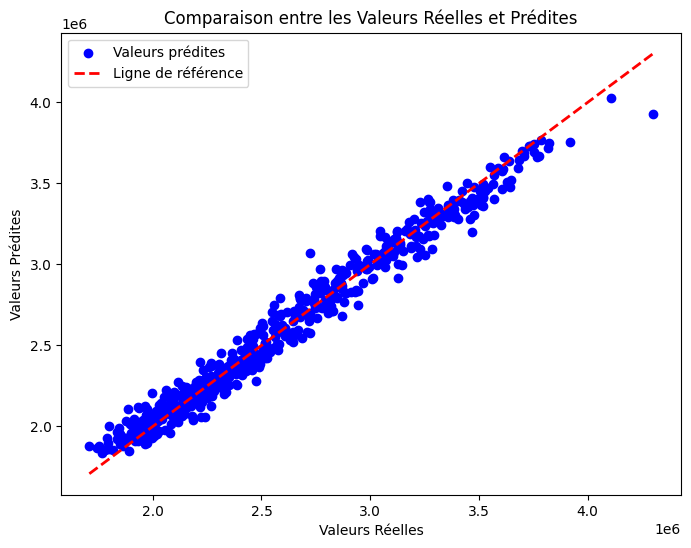

In [ ]:
# Créez une instance du modèle Random Forest avec les paramètres calculé ci dessus
random_forest = RandomForestRegressor(n_estimators=559, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42)

# Entraînez le modèle sur les données d'entraînement
random_forest.fit(X_train_scaled, y_train)

# Faites des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les mesures de performance
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
import matplotlib.pyplot as plt

# Réalisez des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Créez un graphique pour comparer les valeurs réelles et les valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valeurs prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison entre les Valeurs Réelles et Prédites')
plt.legend()
plt.show()

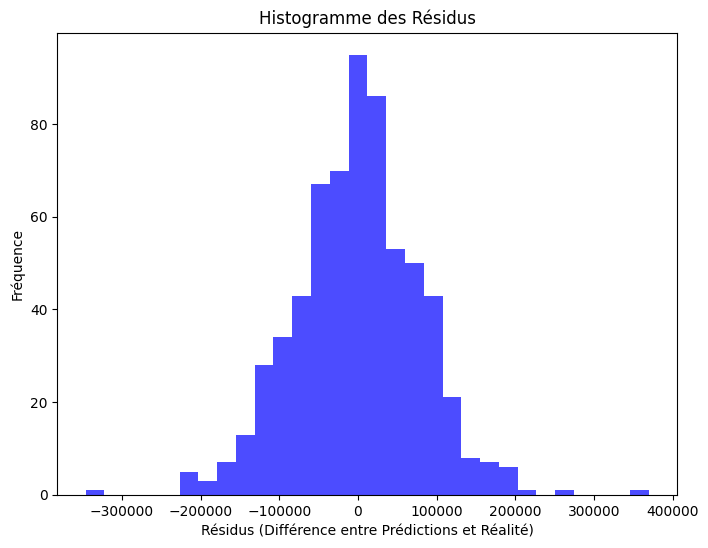

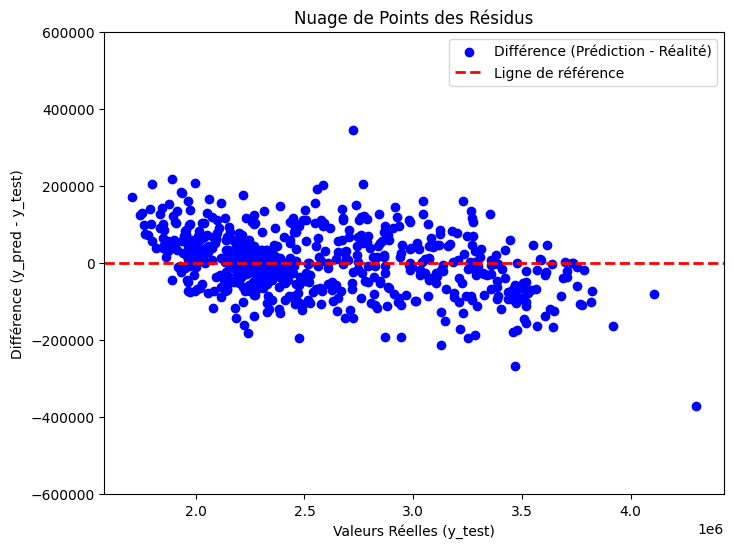

In [ ]:
# Créez un histogramme des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Résidus (Différence entre Prédictions et Réalité)')
plt.ylabel('Fréquence')
plt.title('Histogramme des Résidus')
plt.show()

# Calcul des différences entre les prédictions (y_pred) et les valeurs réelles (y_test)
differences = y_pred - y_test

# Créez un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, differences, c='blue', label='Différence (Prédiction - Réalité)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Ligne de référence')
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Différence (y_pred - y_test)')
plt.ylim([-600000,600000])
plt.title('Nuage de Points des Résidus')
plt.legend()
plt.show()


**DF2 : utilisation du random forest optimisé avec uniquement les features importantes**

Mean Squared Error (MSE): 11630570794.721186
Mean Absolute Error (MAE): 83683.88499801522
R-squared (R2): 0.9580192966766763


<ipython-input-195-16848b9cb8e8>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')


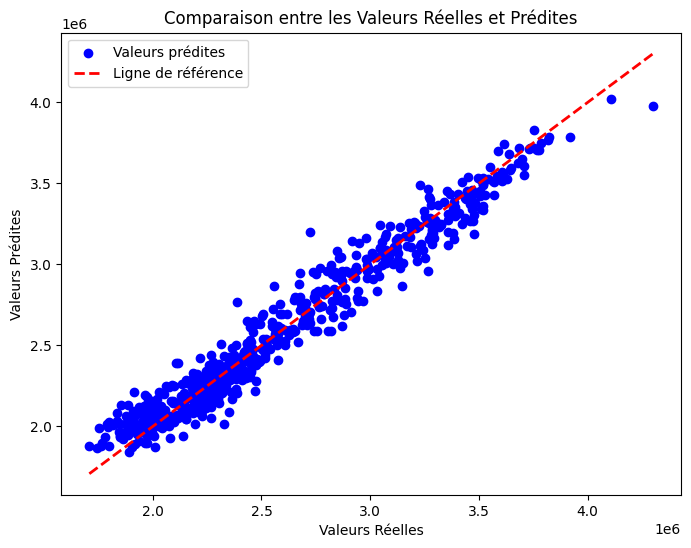

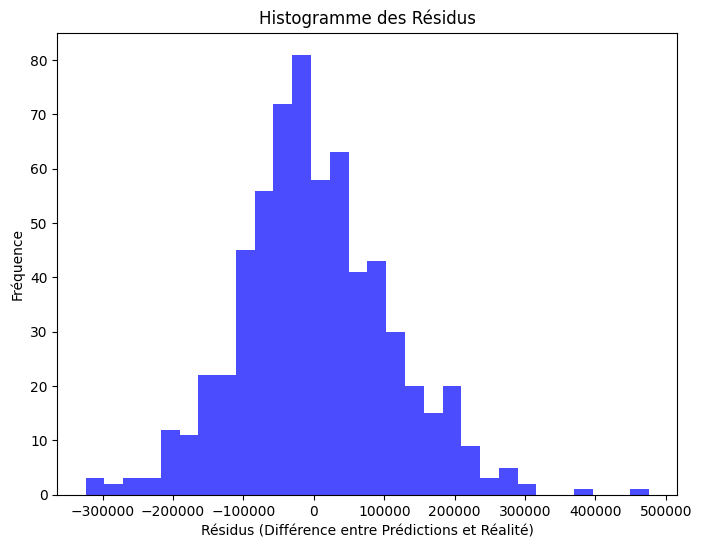

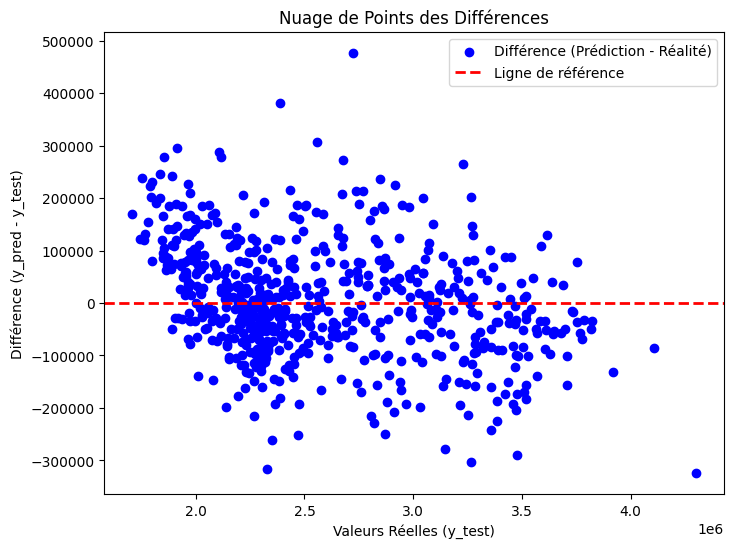

In [ ]:
df2 = df[['Température moyenne (°C)','Température référence (°C)','Bioénergies (MW)','Solaire (MW)','Hydraulique (MW)','Thermique (MW)','Consommation (MW)']]

X=df2.drop('Consommation (MW)',axis=1)
y=df2['Consommation (MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Créez une instance du modèle Random Forest
random_forest = RandomForestRegressor(random_state=42)

# Créez une instance du modèle Random Forest avec les paramètres spécifiés
random_forest = RandomForestRegressor(n_estimators=559, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=42)

# Entraînez le modèle sur les données d'entraînement
random_forest.fit(X_train_scaled, y_train)

# Faites des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichez les mesures de performance
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

import matplotlib.pyplot as plt

# Réalisez des prédictions sur les données de test
y_pred = random_forest.predict(X_test_scaled)

# Créez un graphique pour comparer les valeurs réelles et les valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valeurs prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ligne de référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison entre les Valeurs Réelles et Prédites')
plt.legend()
plt.show()

# Calcul des résidus
residuals = y_pred - y_test

# Créez un histogramme des résidus
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Résidus (Différence entre Prédictions et Réalité)')
plt.ylabel('Fréquence')
plt.title('Histogramme des Résidus')
plt.show()

# Calcul des différences entre les prédictions (y_pred) et les valeurs réelles (y_test)
differences = y_pred - y_test

# Créez un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(y_test, differences, c='blue', label='Différence (Prédiction - Réalité)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Ligne de référence')
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Différence (y_pred - y_test)')
plt.title ('Nuage de Points des Différences')
plt.legend()
plt.show()

**Le GradientBoostingRegressor**

In [ ]:
# On entraîne un modèle de GradientBoostingRegressor
df_gbr = df_cinq

target_gbr = df_gbr['Consommation (MW)']
feats_gbr = df_gbr.drop('Consommation (MW)', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feats_gbr, target_gbr, test_size=0.25, random_state = 42)

cols = feats_gbr.columns
sc = StandardScaler()
X_train.loc[:,cols] = sc.fit_transform(X_train[cols])
X_test.loc[:,cols] = sc.transform(X_test[cols])

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=9, random_state=42, n_estimators=1500, learning_rate=0.05)
gbr.fit(X_train, y_train)
pred_g = gbr.predict(X_test)
pred_g_train = gbr.predict(X_train)
print('Prédictions sur les 5 premières lignes :')
print(y_test[:5] - pred_g[:5])
print('\n')
print("Coefficient de détermination du modèle sur train:" , gbr.score(X_train, y_train))
print("Coefficient de détermination du modèle sur test:", gbr.score(X_test,y_test))

Prédictions sur les 5 premières lignes :
1309    10278.457824
139    -17246.005847
3028    50394.211916
1161    33272.036797
1023    64583.609936
Name: Consommation (MW), dtype: float64


Coefficient de détermination du modèle sur train: 0.9999999996731097
Coefficient de détermination du modèle sur test: 0.9757241127829775


Temps : 1 min et 10 s.
Plus on affine les paramètres et plus le modèle met de temps à tourner.

In [ ]:
# Les métrics du GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

gradboost = ['gradboost test', mean_absolute_error(y_test, pred_g), mean_squared_error(y_test, pred_g), np.sqrt(mean_squared_error(y_test, pred_g)), gbr.score(X_test,y_test)]
gradboost_t = ['gradboost train', mean_absolute_error(y_train, pred_g_train), mean_squared_error(y_train, pred_g_train), np.sqrt(mean_squared_error(y_train, pred_g_train)),
               gbr.score(X_train, y_train)]
tableau = [gradboost,gradboost_t]

dataF = pd.DataFrame(data=tableau, columns=['modèle','mae','mse','rmse','r²'])
display(dataF.set_index('modèle'))

,mae,mse,rmse,r²
modèle,,,,
gradboost test,60305.334476,6.617850e+09,81350.171333,0.975724
gradboost train,6.795930,8.712413e+01,9.334031,1.000000


Conclusion : Il y a un problème de surapprentissage pour le Gardient Boosting. Son coefficient de détermination pour le modèle d'entraînement est égal à 1

In [ ]:
df.to_csv('df_national_nettoye.csv', index=False)
from google.colab import files
files.download('df_national_nettoye.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>